In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./datasets/london_crime_by_lsoa.csv")

In [3]:
df.head()


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [4]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


(13490604, 7)

In [5]:
df.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

## Area Plot
Plot digunakan untuk melihat plot area dari 5 wilayah dengan kasus kriminalitas tertinggi

In [6]:
df_area = df.copy()

In [7]:
df_area.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [8]:
df_area = df_area[['borough','value','year']]


In [9]:
df_area.head()

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008


In [10]:
df_areaplt = df_area.groupby(['borough','year'], axis=0).sum().reset_index()

In [11]:
df_areaplt.head()

,borough,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990


In [12]:
df_areaplt.set_index('year',inplace=True)

In [13]:
df_areaplt.head()

,borough,value
year,,
2008,Barking and Dagenham,17656
2009,Barking and Dagenham,17713
2010,Barking and Dagenham,17130
2011,Barking and Dagenham,16686
2012,Barking and Dagenham,15990


In [14]:
df_areaplt = df_areaplt.pivot_table(index= 'year', columns= 'borough', values='value')

In [15]:
df_areaplt.head()

borough,Barking and Dagenham,Barnet,Bexley,Brent,Bromley,Camden,City of London,Croydon,Ealing,Enfield,...,Merton,Newham,Redbridge,Richmond upon Thames,Southwark,Sutton,Tower Hamlets,Waltham Forest,Wandsworth,Westminster
year,,,,,,,,,,,,,,,,,,,,,
2008,17656,23944,15305,23504,24015,32010,0,29516,28947,21980,...,13875,29752,20873,11106,33470,12943,23578,24080,23330,47846
2009,17713,23449,14445,24748,21858,31612,0,29784,28617,21147,...,13561,28610,20837,10618,30623,12240,21959,24761,23021,48456
2010,17130,23416,13166,25512,19572,31804,0,29373,31360,20808,...,13595,30728,20652,10601,31320,12032,23072,24818,22815,48116
2011,16686,24007,11325,27669,19868,33956,69,29830,29537,21041,...,13548,27978,21994,10896,30723,11068,24712,23714,21384,54243
2012,15990,23573,11669,26357,19622,31472,157,30189,28832,21069,...,12856,30067,21424,11168,30737,10948,26784,22647,24457,59226


In [16]:
df_areaplt.index.name = None

In [17]:
df_areaplt.columns.name = None

In [18]:
df_areaplt = df_areaplt.transpose()

In [19]:
df_areaplt.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164


In [20]:
df_areaplt['Total'] = df_areaplt.sum(axis=1, skipna= True)

In [21]:
df_areaplt.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Barking and Dagenham,17656,17713,17130,16686,15990,15759,15426,16346,16741,149447
Barnet,23944,23449,23416,24007,23573,22510,22572,24036,24684,212191
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551
Bromley,24015,21858,19572,19868,19622,18945,19668,20637,20164,184349


In [22]:
df_areaplt.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_areaplt.head(10)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330,455028
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071,292178
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636,278809
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183,275147
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090,262024
Croydon,29516,29784,29373,29830,30189,27444,27357,28089,28712,260294
Ealing,28947,28617,31360,29537,28832,25917,24978,26247,27127,251562
Islington,26273,25485,24693,24980,26268,23784,24679,27032,27092,230286
Tower Hamlets,23578,21959,23072,24712,26784,26258,25504,27493,29253,228613
Brent,23504,24748,25512,27669,26357,23759,24426,24883,26693,227551


In [23]:
df_areaplt.tail()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total
Bexley,15305,14445,13166,11325,11669,11552,11844,11990,12840,114136
Sutton,12943,12240,12032,11068,10948,10057,10443,10598,10658,100987
Richmond upon Thames,11106,10618,10601,10896,11168,10439,10456,10413,11074,96771
Kingston upon Thames,10661,10163,10171,10155,9956,9191,9288,9738,9983,89306
City of London,0,0,0,69,157,110,115,151,178,780


In [24]:
df_topcrime = df_areaplt.head(5).transpose()

In [25]:
df_topcrime.head(10)

,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067
2013,53852,31868,31128,28435,27577
2014,47564,31765,28912,27198,28005
2015,47395,33164,30260,29477,29217
2016,48330,34071,31636,29183,30090
Total,455028,292178,278809,275147,262024


In [26]:
df_topcrime.drop('Total', axis =0,inplace=True)


In [27]:
df_topcrime.index.map(int)

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016], dtype='int64')

In [28]:
df_topcrime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2008 to 2016
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Westminster  9 non-null      int64
 1   Lambeth      9 non-null      int64
 2   Southwark    9 non-null      int64
 3   Camden       9 non-null      int64
 4   Newham       9 non-null      int64
dtypes: int64(5)
memory usage: 432.0+ bytes


In [29]:
df_topcrime.head()

,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846,31717,33470,32010,29752
2009,48456,31225,30623,31612,28610
2010,48116,31671,31320,31804,30728
2011,54243,33224,30723,33956,27978
2012,59226,33473,30737,31472,30067


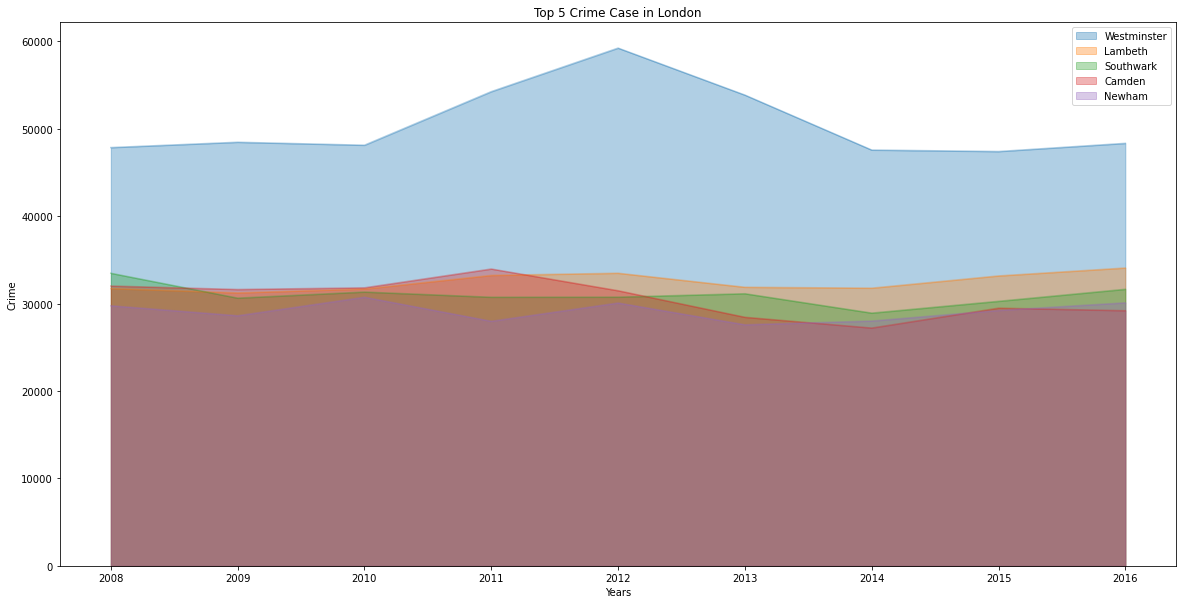

In [30]:
df_topcrime.plot(kind='area', 
             stacked=False,
             alpha = 0.35,
             figsize=(20, 10), # pass a tuple (x, y) size
             )

plt.title('Top 5 Crime Case in London')
plt.ylabel('Crime')
plt.xlabel('Years')

plt.show()

## Histogram
Histogram digunakan untuk melihat banyaknya daerah pada rentang kriminalitas tertentu di London pada tahun 2015

In [31]:
df_hist = df_area.copy()

In [32]:
df_hist.head()

,borough,value,year
0,Croydon,0,2016
1,Greenwich,0,2016
2,Bromley,0,2015
3,Redbridge,0,2016
4,Wandsworth,0,2008


In [33]:
df_hist = df_hist[df_hist['year'] == 2015]

In [34]:
df_hist.sort_values("borough",inplace=True)

In [35]:
df_hist = df_hist.groupby(['borough','year'], axis=0).sum().reset_index()

In [36]:
df_hist.shape

(33, 3)

In [37]:
df_hist.head()

,borough,year,value
0,Barking and Dagenham,2015,16346
1,Barnet,2015,24036
2,Bexley,2015,11990
3,Brent,2015,24883
4,Bromley,2015,20637


In [38]:
count, bin_edges = np.histogram(df_hist['value'])

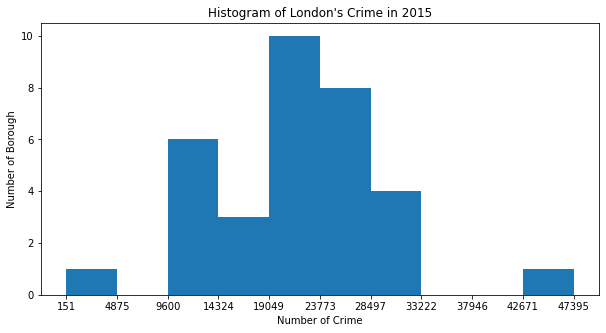

In [39]:
df_hist['value'].plot(kind='hist', figsize=(10, 5), xticks=bin_edges)

plt.title("Histogram of London's Crime in 2015") # add a title to the histogram
plt.ylabel('Number of Borough') # add y-label
plt.xlabel('Number of Crime') # add x-label

plt.show()

Histogram menunjukkan bahwa wilayah terbanyak berada pada rentang kasus kriminal sebanyak 19049-23773 kasus

## Bar Chart
Bar chart digunakan untuk melihat banyaknya kasus pencurian di wilayah Greenwich dari tahun 2008 - 2016

In [40]:
df_bar = df.copy()

In [41]:
df_bar.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [42]:
df_bar = df_bar[['borough', 'major_category', 'value','year']]

In [43]:
df_bar = df_bar[(df_bar['borough'] == "Greenwich")&(df_bar['major_category'] == 'Robbery')]

In [44]:
df_bar.shape

(30240, 4)

In [45]:
df_bar.head()

,borough,major_category,value,year
333,Greenwich,Robbery,0,2015
335,Greenwich,Robbery,0,2009
728,Greenwich,Robbery,0,2013
941,Greenwich,Robbery,1,2016
1123,Greenwich,Robbery,0,2009


In [46]:
df_bar = df_bar.groupby(['major_category','year'], axis=0).sum().reset_index()

In [47]:
df_bar.head()

,major_category,year,value
0,Robbery,2008,898
1,Robbery,2009,680
2,Robbery,2010,711
3,Robbery,2011,741
4,Robbery,2012,580


In [48]:
df_bar.shape

(9, 3)

In [49]:
df_bar.set_index('year',inplace=True)

In [50]:
df_barplt = df_bar.loc[:,'value']

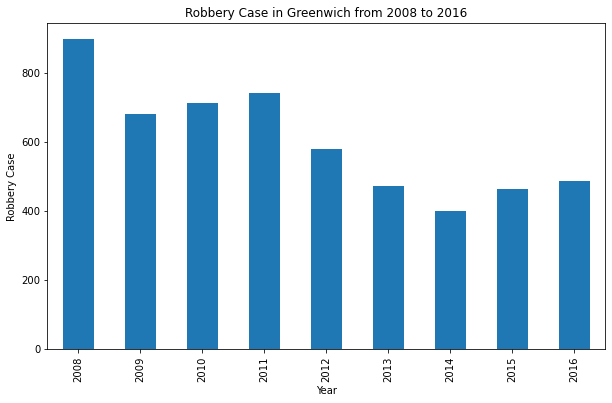

In [242]:
df_barplt.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Robbery Case') # add y-label to the plot
plt.title('Robbery Case in Greenwich from 2008 to 2016') # add title to the plot

plt.show()

Data menunjukkan bahwa kasus pencurian terbanyak terjadi pada tahun 2008 dan terendah 2015 dengan kasus yang tampak fluktuatif

## Pie Chart
Pie chart digunakan untuk melihat proporsi kategori kriminal di wilayah Bromley pada tahun 2010

In [52]:
df_pie = df.copy()

In [53]:
df_pie = df[['borough','major_category','value','year']]

In [54]:
df_pie.head()

,borough,major_category,value,year
0,Croydon,Burglary,0,2016
1,Greenwich,Violence Against the Person,0,2016
2,Bromley,Violence Against the Person,0,2015
3,Redbridge,Burglary,0,2016
4,Wandsworth,Robbery,0,2008


In [55]:
df_pie = df_pie[(df_pie['borough'] == 'Bromley')&(df_pie['year']== 2010)]

In [56]:
df_pie.head()

,borough,major_category,value,year
183,Bromley,Robbery,0,2010
328,Bromley,Violence Against the Person,2,2010
468,Bromley,Theft and Handling,1,2010
547,Bromley,Theft and Handling,0,2010
718,Bromley,Theft and Handling,1,2010


In [57]:
df_pie = df_pie.groupby(['major_category','year'], axis=0).sum().reset_index()

In [58]:
df_pie.set_index('major_category',inplace=True)

In [59]:
df_pie = df_pie[df_pie['value']!=0]

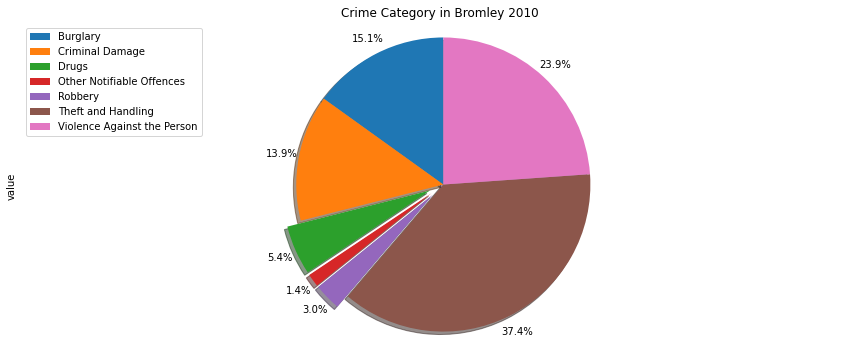

In [60]:
explode_list = [0, 0, 0.1, 0.1, 0.1, 0,0]
df_pie['value'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         
                            pctdistance=1.12,     
                            explode=explode_list            
                            )

plt.title('Crime Category in Bromley 2010')
plt.axis('equal')
plt.legend(labels=df_pie.index, loc='upper left') 

plt.show()

Data menunjukkan bahwa proporsi kategori kriminal terbesar di Bromley pada tahun 2010 adalah 37.4%

## Box Plot
Box plot digunakan untuk membandingkan distribusi kriminalitas antara Newham dan Candem

In [61]:
df_bxplt = df_topcrime.copy().transpose()

In [62]:
df_bxplt.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016
Westminster,47846,48456,48116,54243,59226,53852,47564,47395,48330
Lambeth,31717,31225,31671,33224,33473,31868,31765,33164,34071
Southwark,33470,30623,31320,30723,30737,31128,28912,30260,31636
Camden,32010,31612,31804,33956,31472,28435,27198,29477,29183
Newham,29752,28610,30728,27978,30067,27577,28005,29217,30090


In [63]:
df_bxplt = df_bxplt.loc[['Newham','Camden']].transpose()

In [64]:
df_bxplt.head()

,Newham,Camden
2008,29752,32010
2009,28610,31612
2010,30728,31804
2011,27978,33956
2012,30067,31472


In [65]:
df_bxplt.describe()

,Newham,Camden
count,9.000000,9.000000
mean,29113.777778,30571.888889
std,1119.162385,2121.547633
min,27577.000000,27198.000000
25%,28005.000000,29183.000000
50%,29217.000000,31472.000000
75%,30067.000000,31804.000000
max,30728.000000,33956.000000


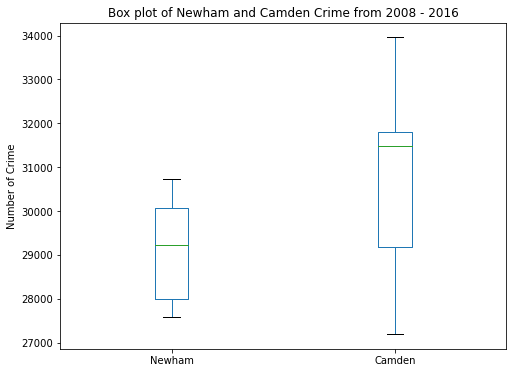

In [66]:
df_bxplt.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Newham and Camden Crime from 2008 - 2016')
plt.ylabel('Number of Crime')

plt.show()

pada box plot tampak bahwa rentang jumlah kriminalitas pada camden lebih besar

## Scatter Plot
Scatter plot digunakan untuk melihat sebaran kriminal per bulan pada tahun 2016

In [67]:
df_area.shape

(13490604, 3)

In [68]:
df_scatter = df_area.groupby(['year'], axis=0).sum().reset_index()

In [69]:
df_scatter.head()

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329


In [70]:
df_scatter

,year,value
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


In [71]:
df_scatter = df[df['year'] == 2016]

In [72]:
df_scatter = df_scatter[['month','value','year']]

In [73]:
df_scatter.head()

,month,value,year
0,11,0,2016
1,11,0,2016
3,3,0,2016
9,8,1,2016
14,2,0,2016


In [74]:
df_scatter.shape

(1498956, 3)

In [75]:
df_scatter = df_scatter.groupby(['month','year'], axis=0).sum().reset_index()

In [76]:
df_scatter.head()

,month,year,value
0,1,2016,58847
1,2,2016,56697
2,3,2016,59167
3,4,2016,58637
4,5,2016,63990


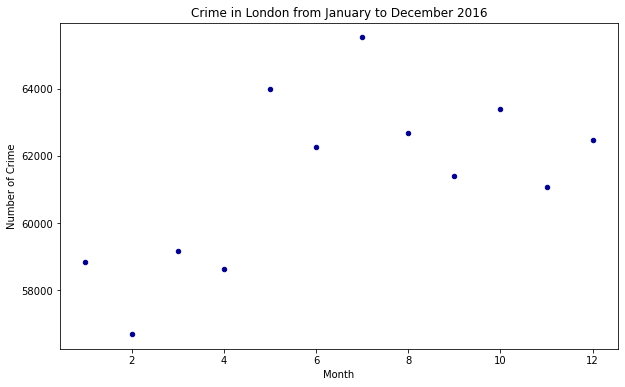

In [77]:
df_scatter.plot(kind='scatter', x='month', y='value', figsize=(10, 6), color='darkblue')
plt.title('Crime in London from January to December 2016')
plt.xlabel('Month')
plt.ylabel('Number of Crime')
plt.show()

Data menunjukkan bahwa sebaran kasus kriminal London pada tahun 2016 tidak menunjukkan trend tiap bulannya

## Word Clouds

In [220]:
text = ""

In [221]:
df_word = df[(df['borough']=='Redbridge')&(df['year']==2009)]

In [222]:
df_word = df_word[['minor_category','value']] 

In [223]:
df_word = df_word.groupby(['minor_category'], axis=0).sum().reset_index()

In [224]:
df_word.head()

,minor_category,value
0,Assault with Injury,1373
1,Burglary in Other Buildings,740
2,Burglary in a Dwelling,2581
3,Business Property,126
4,Common Assault,875


In [225]:
df_word.shape

(32, 2)

In [226]:
df_word.sort_values('value',inplace=True,ignore_index=True)

In [227]:
df_word.head()

,minor_category,value
0,Rape,0
1,Other Sexual,0
2,Counted per Victim,0
3,Other Fraud & Forgery,0
4,Murder,1


In [235]:
for i in range (len(df_word["minor_category"])):
    word = ((df_word['minor_category'][i])+' stop ')*(df_word['value'][i])
    text += word

In [236]:
from wordcloud import WordCloud, STOPWORDS

In [238]:
stopwords = set(STOPWORDS).update([' . '])

In [239]:
df_word['value'].sum()

20837

In [240]:
cloud = WordCloud(
    background_color='white',
    max_words=20837,
    stopwords=stopwords
)

# generate the word cloud
cloud.generate(text)

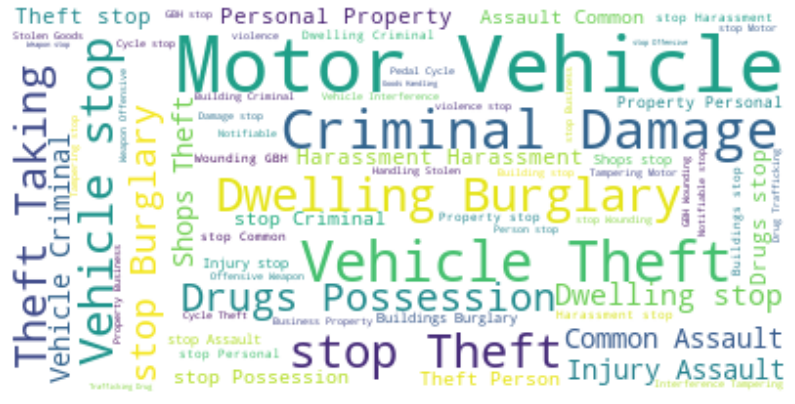

In [241]:
fig = plt.figure()
fig.set_figwidth(14) 
fig.set_figheight(18) 

plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Folium Maps

tidak terdapat data posisi dari wilayah